In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("astronauts.csv")
print(data.head())
print(data.columns)
print(data.dtypes)
print(len(data.index))

               Name    Year  Group   Status Birth Date    Birth Place Gender  \
0   Joseph M. Acaba  2004.0   19.0   Active  5/17/1967  Inglewood, CA   Male   
1    Loren W. Acton     NaN    NaN  Retired   3/7/1936   Lewiston, MT   Male   
2  James C. Adamson  1984.0   10.0  Retired   3/3/1946     Warsaw, NY   Male   
3   Thomas D. Akers  1987.0   12.0  Retired  5/20/1951  St. Louis, MO   Male   
4       Buzz Aldrin  1963.0    3.0  Retired  1/20/1930  Montclair, NJ   Male   

                                          Alma Mater     Undergraduate Major  \
0  University of California-Santa Barbara; Univer...                 Geology   
1   Montana State University; University of Colorado     Engineering Physics   
2          US Military Academy; Princeton University             Engineering   
3                       University of Missouri-Rolla     Applied Mathematics   
4                           US Military Academy; MIT  Mechanical Engineering   

          Graduate Major Military Rank

In [3]:
drop_columns = data.drop(columns=['Group', 'Birth Date', 'Birth Place', 'Military Rank', 'Military Branch', 'Space Flights', 'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)', 'Missions', 'Death Date', "Death Mission"])

In [4]:
drop_columns['Year'] = drop_columns['Year'].fillna(0)
clean_data=drop_columns.astype({'Year': 'int32'})
print(clean_data.head())

               Name  Year   Status Gender  \
0   Joseph M. Acaba  2004   Active   Male   
1    Loren W. Acton     0  Retired   Male   
2  James C. Adamson  1984  Retired   Male   
3   Thomas D. Akers  1987  Retired   Male   
4       Buzz Aldrin  1963  Retired   Male   

                                          Alma Mater     Undergraduate Major  \
0  University of California-Santa Barbara; Univer...                 Geology   
1   Montana State University; University of Colorado     Engineering Physics   
2          US Military Academy; Princeton University             Engineering   
3                       University of Missouri-Rolla     Applied Mathematics   
4                           US Military Academy; MIT  Mechanical Engineering   

          Graduate Major  
0                Geology  
1          Solar Physics  
2  Aerospace Engineering  
3    Applied Mathematics  
4           Astronautics  


In [5]:
active_astronauts = clean_data.query('Status == "Active"')
df = pd.DataFrame(active_astronauts, columns=["Name", "Year", "Status", "Gender", "Alma Mater", "Undergraduate Major", "Graduate Major"])
head_df = df.head()
head_df.style

,Name,Year,Status,Gender,Alma Mater,Undergraduate Major,Graduate Major
0,Joseph M. Acaba,2004,Active,Male,University of California-Santa Barbara; University of Arizona,Geology,Geology
11,Dominic A. Antonelli,2000,Active,Male,MIT; University of Washington,Aeronautics & Astronautics,Aeronautics & Astronautics
15,Richard R. Arnold II,2004,Active,Male,Frostburg State University; University of Maryland,Accounting,Environmental Science
17,Serena M. Aunon,2009,Active,Female,George Washington University; University of Texas,Electrical Engineering,Medicine
21,Michael R. Barratt,2000,Active,Male,University of Washington; Northwestern University; Wright State University,Zoology,Medicine; Aerospace Medicine


In [6]:
print(df["Name"].count())
freq_UM = df["Undergraduate Major"].value_counts()
freq_UM = pd.DataFrame(freq_UM)
print(freq_UM)

50
                                                    Undergraduate Major
Electrical Engineering                                                6
Aerospace Engineering                                                 4
Physics                                                               4
Mechanical Engineering                                                4
Mathematics                                                           3
Aeronautical Engineering                                              3
Chemistry                                                             2
Applied Science & Engineering                                         2
Geology                                                               2
Engineering Science                                                   1
Computer Science                                                      1
Accounting                                                            1
Physical Science                                             

In [7]:
freq_UM = freq_UM[freq_UM["Undergraduate Major"] != 1]
print(freq_UM)

                               Undergraduate Major
Electrical Engineering                           6
Aerospace Engineering                            4
Physics                                          4
Mechanical Engineering                           4
Mathematics                                      3
Aeronautical Engineering                         3
Chemistry                                        2
Applied Science & Engineering                    2
Geology                                          2


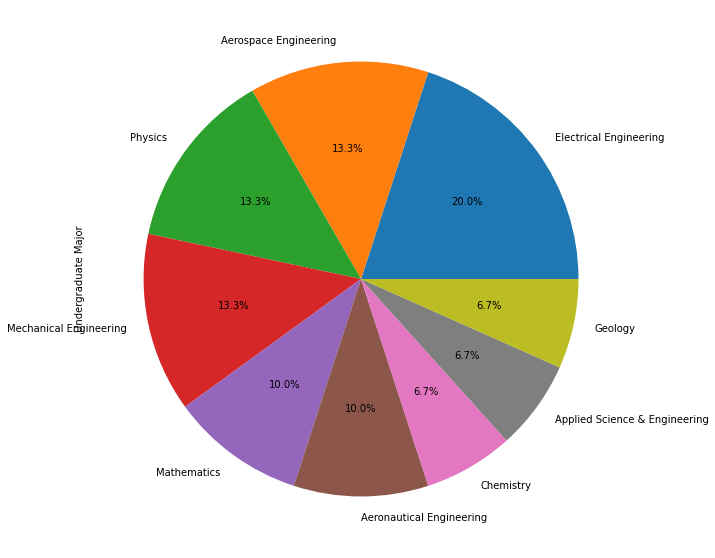

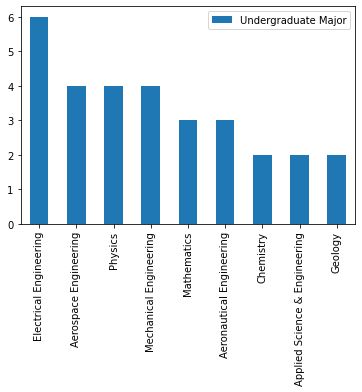

In [8]:
import matplotlib.pyplot as plt
freq_UM.plot.pie(y='Undergraduate Major', figsize=(10, 10), legend=False, autopct='%1.1f%%')
freq_UM.plot.bar(y='Undergraduate Major')

                            Graduate Major
Aerospace Engineering                    4
Mechanical Engineering                   3
Ocean Engineering                        2
Aeronautics & Astronautics               2
Aviation Systems                         2
Engineering Management                   2


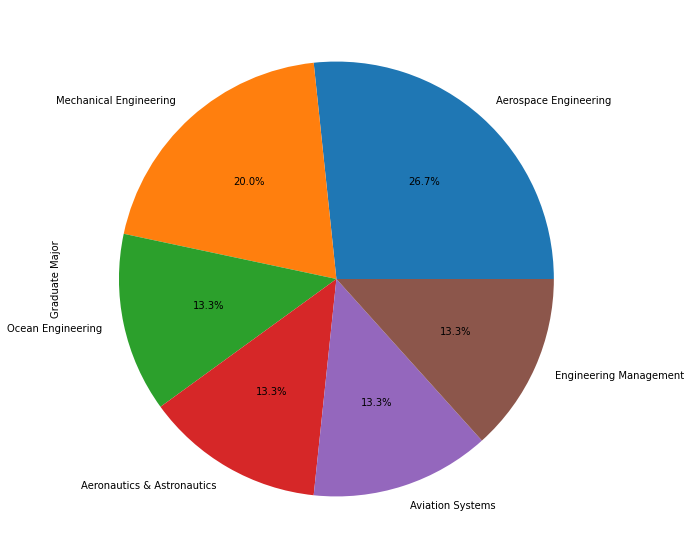

In [9]:
freq_GM = df["Graduate Major"].value_counts()
freq_GM = pd.DataFrame(freq_GM)
freq_GM = freq_GM[freq_GM["Graduate Major"] != 1]
print(freq_GM)
freq_GM.plot.pie(y='Graduate Major', figsize=(10, 10), legend=False, autopct='%1.1f%%')

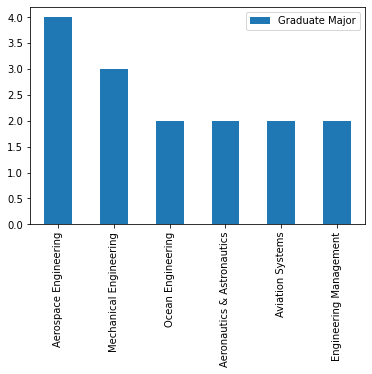

In [10]:
freq_GM.plot.bar(y='Graduate Major')

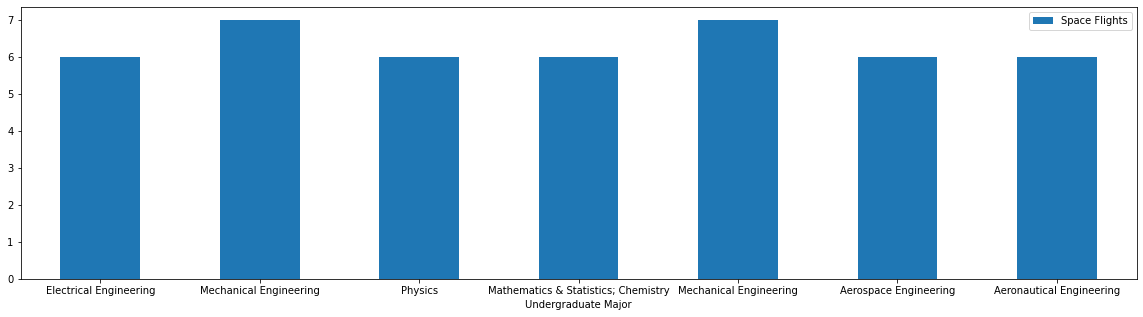

In [11]:
more_than_five_spaceflights = data.query('`Space Flights` > 5')
total_spaceflights = data["Space Flights"].count()
more_than_five_spaceflights.plot.bar(x='Undergraduate Major', y='Space Flights', rot=0, figsize=(20, 5))

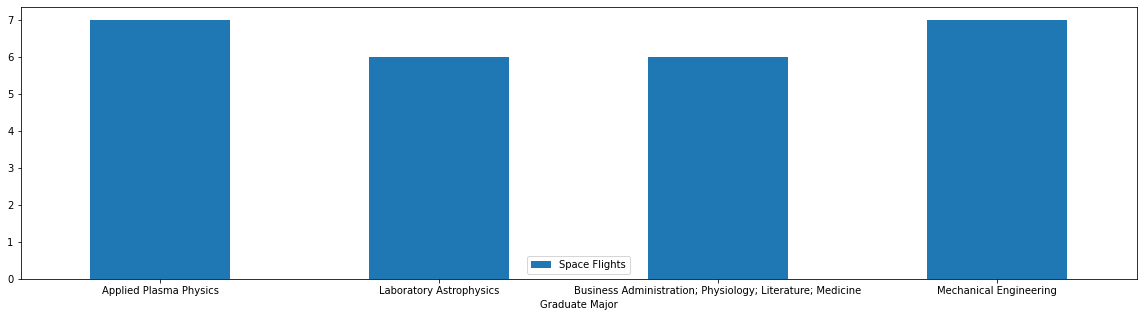

In [12]:
more_than_five_spaceflights_no_nan = more_than_five_spaceflights.dropna(subset=['Graduate Major'])
#print(more_than_five_spaceflights_no_nan.head)
more_than_five_spaceflights_no_nan.plot.bar(x='Graduate Major', y='Space Flights', rot=0, figsize=(20, 5))

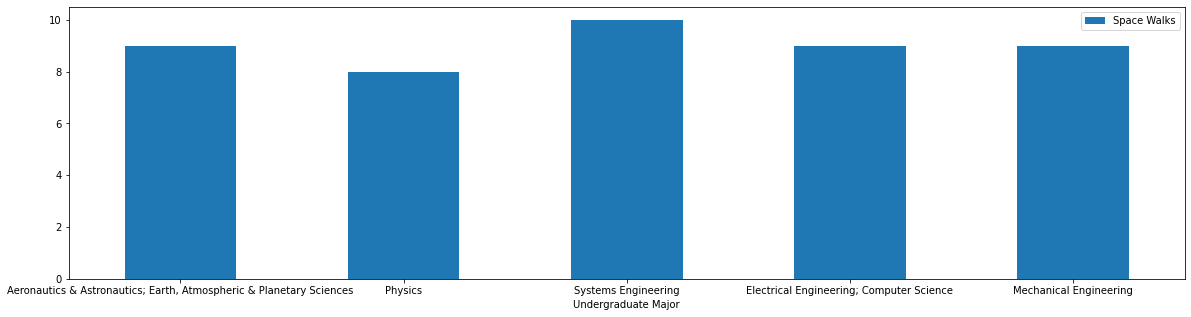

In [13]:
more_than_seven_space_walks = data.query('`Space Walks` > 7')
more_than_seven_space_walks.plot.bar(x='Undergraduate Major', y='Space Walks', rot=0, figsize=(20, 5))

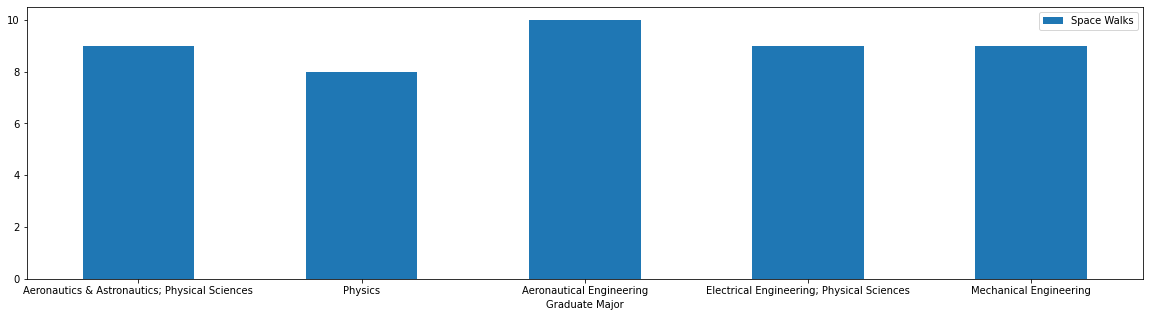

In [14]:
more_than_seven_space_walks.plot.bar(x='Graduate Major', y='Space Walks', rot=0, figsize=(20, 5))

13


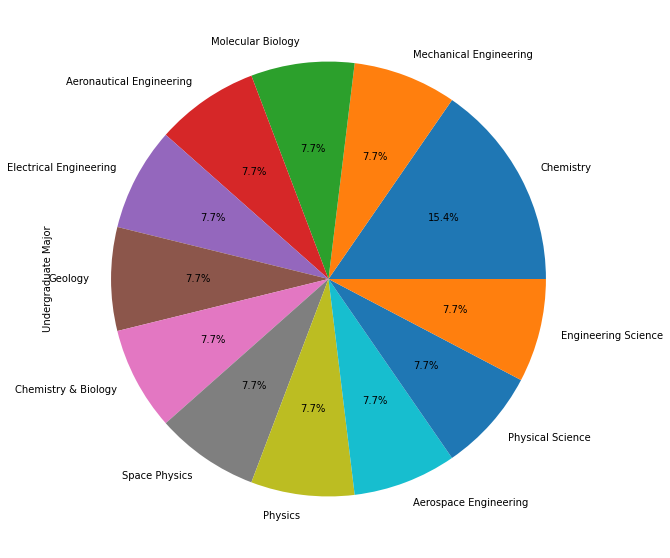

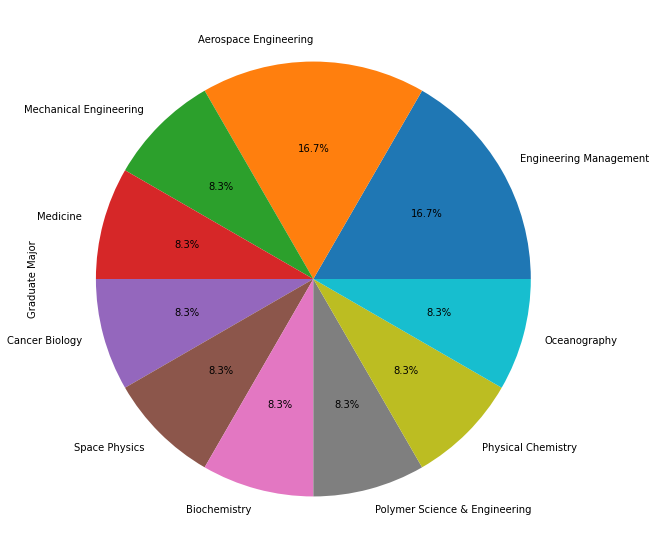

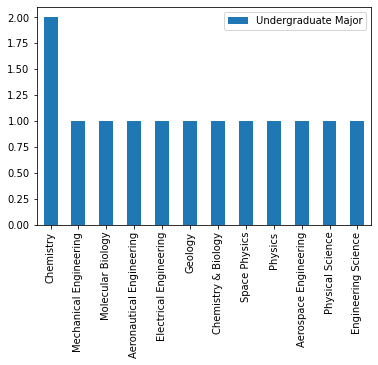

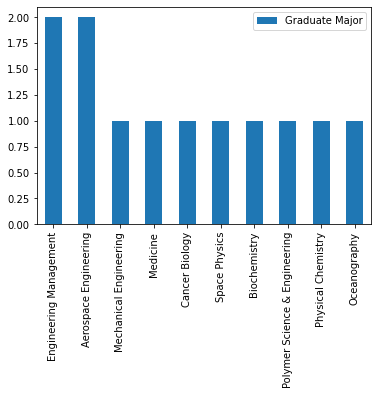

In [15]:
# filter only female astronauts
female_astronauts = active_astronauts.query("Gender == 'Female'")
print(female_astronauts["Name"].count())

# count amount of majors
female_freq_UM = female_astronauts["Undergraduate Major"].value_counts()
female_freq_GM = female_astronauts["Graduate Major"].value_counts()

# make into data frame
female_freq_UM = pd.DataFrame(female_freq_UM)
female_freq_GM = pd.DataFrame(female_freq_GM)

# exclude all values that are 1
#female_freq_UM = female_freq_UM[female_freq_UM["Undergraduate Major"] != 1]
#female_freq_GM = female_freq_GM[female_freq_GM["Graduate Major"] != 1]

# create pie plot
female_freq_UM.plot.pie(y='Undergraduate Major', figsize=(10, 10), legend=False, autopct='%1.1f%%')
female_freq_GM.plot.pie(y='Graduate Major', figsize=(10, 10), legend=False, autopct='%1.1f%%')

# create bar plot
female_freq_UM.plot.bar(y='Undergraduate Major')
female_freq_GM.plot.bar(y='Graduate Major')

37


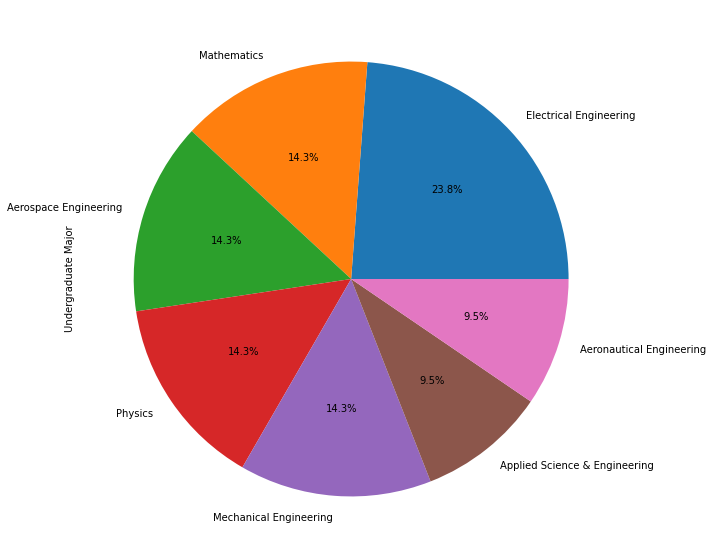

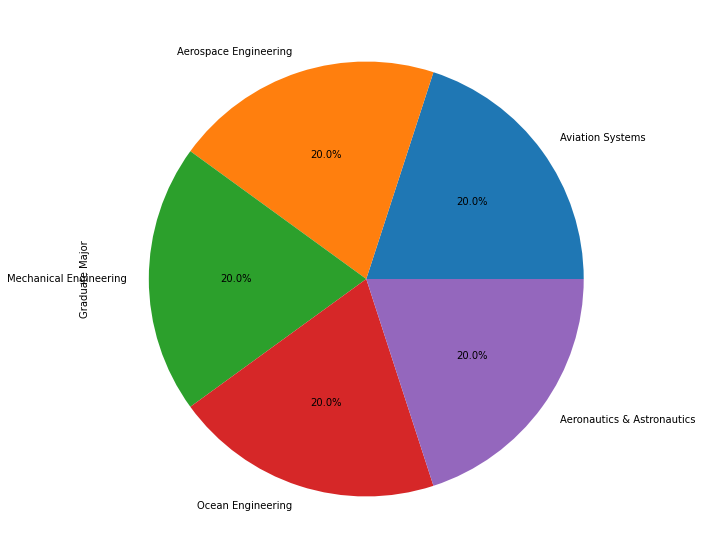

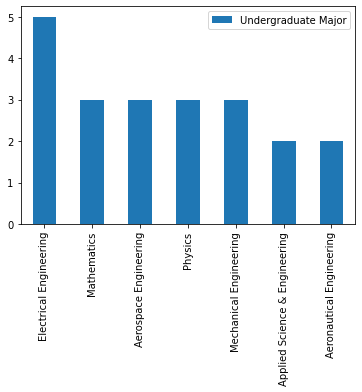

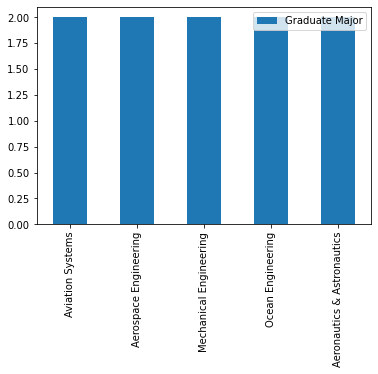

In [16]:
# filter only male astronauts
male_astronauts = active_astronauts.query("Gender == 'Male'")
print(male_astronauts["Name"].count())

# count amount of majors
male_freq_UM = male_astronauts["Undergraduate Major"].value_counts()
male_freq_GM = male_astronauts["Graduate Major"].value_counts()

# make into data frame
male_freq_UM = pd.DataFrame(male_freq_UM)
male_freq_GM = pd.DataFrame(male_freq_GM)

# exclude all values that are 1
male_freq_UM = male_freq_UM[male_freq_UM["Undergraduate Major"] != 1]
male_freq_GM = male_freq_GM[male_freq_GM["Graduate Major"] != 1]

# create pie plot
male_freq_UM.plot.pie(y='Undergraduate Major', figsize=(10, 10), legend=False, autopct='%1.1f%%')
male_freq_GM.plot.pie(y='Graduate Major', figsize=(10, 10), legend=False, autopct='%1.1f%%')

# create bar plot
male_freq_UM.plot.bar(y='Undergraduate Major')
male_freq_GM.plot.bar(y='Graduate Major')